In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import statistics
from sklearn.linear_model import Ridge
import seaborn as sns

In [3]:
# reading both csv files
data_gen = pd.read_csv('Data/heart.csv')

In [4]:
data_gen.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


For reference, the acronyms at the table have the following meaning:

age - age in years

sex - sex (1 = male; 0 = female)

cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slp - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

ca - number of major vessels (0-3) colored by flouroscopy

thal - Thalium Stress Test result (2 = normal; 1 = fixed defect; 3 = reversable defect) - The results of this test will tell you about the flow of blood to your heart through your coronary arteries

In [23]:
# separating the columns of the dataframe and creating a dictionary
dt1 = {}
for i in list(data_gen.columns):
    dt1[i] = data_gen[i].value_counts().shape[0]

pd.DataFrame(dt1, index=['count']).transpose()

,count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [24]:
# separating categorical and continuous variable. As well as defining the target
cat = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
con = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
target = ['output']

In [25]:
# creating a description of the data based on the continuous values
data_gen[con].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


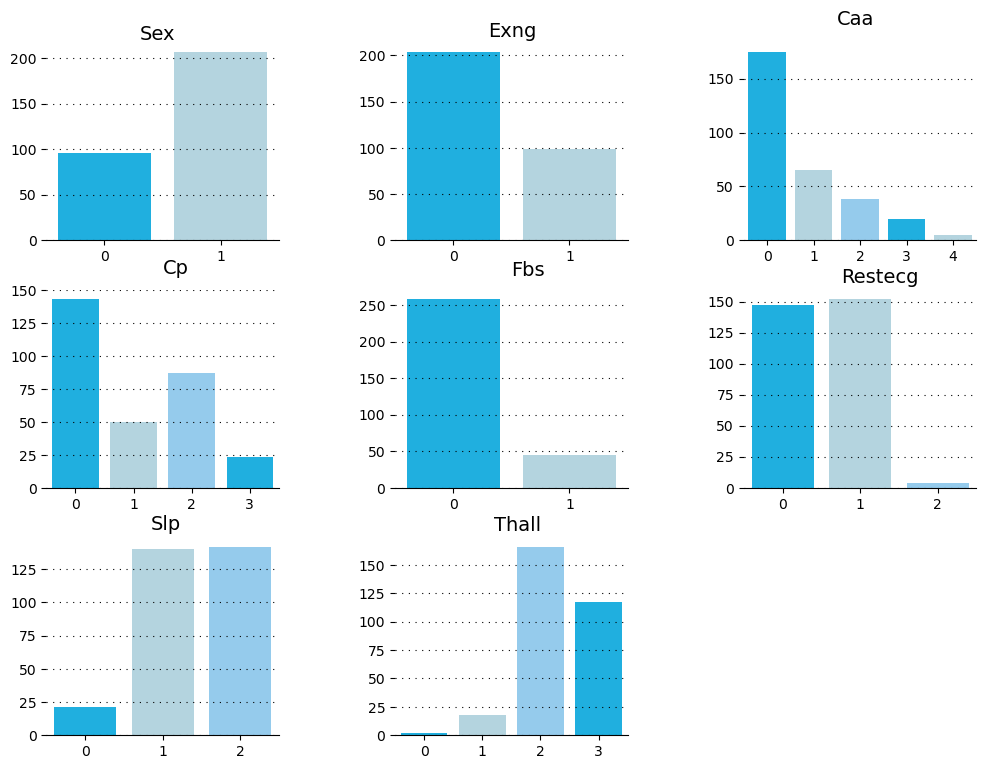

In [37]:
# making the univariate analysis
# separting the subplots in only one image (makes it easies to manipulate later)
fig = plt.figure(figsize = (12, 9))
grid = fig.add_gridspec(3, 3)
grid.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(grid[0,0])
ax1 = fig.add_subplot(grid[0,1])
ax2 = fig.add_subplot(grid[0,2])
ax3 = fig.add_subplot(grid[1,0])
ax4 = fig.add_subplot(grid[1,1])
ax5 = fig.add_subplot(grid[1,2])
ax6 = fig.add_subplot(grid[2,0])
ax7 = fig.add_subplot(grid[2,1])

# defining color and other customization options
colors = ['deepskyblue', 'lightblue', 'lightskyblue']

# creating the graphs
# Sex count
ax0.text(0.3, 220, 'Sex', fontsize=14, color = '#000000')
ax0.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,5))
sns.countplot(ax = ax0, data = data_gen, x = 'sex', palette = colors)
ax0.set_xlabel("")
ax0.set_ylabel("")

# Exng count
ax1.text(0.3, 220, 'Exng', fontsize = 14, color = '#000000')
ax1.grid(color = '#000000', linestyle = ':', axis = 'y', zorder=0,  dashes=(1,5))
sns.countplot(ax = ax1, data = data_gen,x = 'exng', palette = colors)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa count
ax2.text(1.5, 200, 'Caa', fontsize = 14, color = '#000000')
ax2.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,5))
sns.countplot(ax = ax2, data = data_gen, x = 'caa', palette = colors)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Cp count
ax3.text(1.5, 162, 'Cp', fontsize = 14, color = '#000000')
ax3.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,5))
sns.countplot(ax=ax3,data=data_gen,x = 'cp',palette = colors)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Fbs count
ax4.text(0.5, 290, 'Fbs', fontsize = 14, color = '#000000')
ax4.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,5))
sns.countplot(ax = ax4, data = data_gen, x = 'fbs',palette = colors)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Restecg count
ax5.text(0.75, 165, 'Restecg', fontsize = 14, color = '#000000')
ax5.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,5))
sns.countplot(ax = ax5, data = data_gen, x = 'restecg', palette = colors)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Slp count
ax6.text(0.85, 155, 'Slp', fontsize=14, color = '#000000')
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax = ax6, data = data_gen, x = 'slp', palette=colors)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Thall count
ax7.text(1.2, 180, 'Thall', fontsize = 14, color = '#000000')
ax7.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,5))
sns.countplot(ax = ax7, data = data_gen, x = 'thall', palette = colors)
ax7.set_xlabel("")
ax7.set_ylabel("")

#removing borders
for s in ['top', 'right', 'left']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)

Looking individually at the univariate analysis of the categorical variables we have:
 - This data is composed of roughly 2/3 males
 - Most people did not have chest pain from exercises (exng)
 - Most people have no problems with their major vessels (showed by the number 0), but there are some marked with the number 4, which should not happen (this variable goes from 0 to 3)
 - There are more people with a number 2 chest pain, which is a atypical angina [(Is unpredictable and occurs at rest. Or the angina pain is worsening and occurs with less physical effort)](https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373#:~:text=Angina%20pain%20is%20often%20described,that%20goes%20away%20with%20treatment.).
 - For Blood Sugar, roughly 1/6 of the people have a reading above 120mg/dl (the maximun amount).
 - Almost 50% of the people had results considered as hypertrophy of the ST-T waves in their eletrocardiographic, more than half had some abnormality in their readings (those abnormalities can had multiple explanations and can be linked with things that are not worrisome. The reading would need to be specified to have a better understanding).
 - The Slope is measured through exercise induced increments in heart rate. FOr results represented by the number 0, almost 25 patients had a downslope and more than 125 had a flat ST depression, depending on how attuned the downslope is and how was their hear rate, it could mean a severe cardiac problem. (correlate slp with heart rate)
 - The Thall test goes from 1 to 3 (2 being the normal result). The presence of a 0 could mean that those patients did not participate in this test or they have a irreversable defect in their coronary vessels. Most of the test subjects had a normal test, while less than 25 had a defect, but it was fixed, while almost 125 people had a defect, but it could be fixed. (this is another variable that can be compared to heart rate)

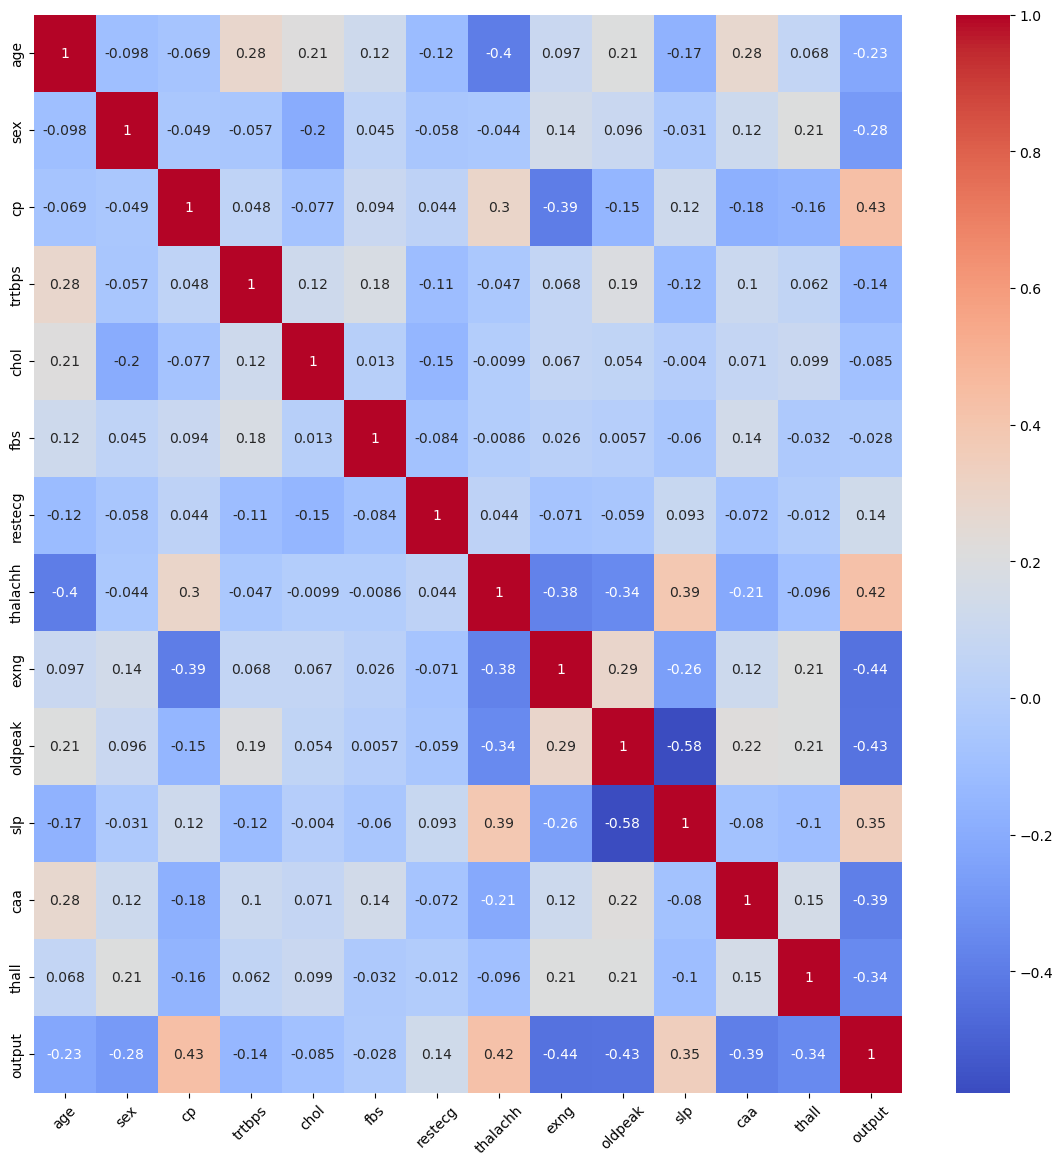

In [7]:
# Creating a full correlation matrix using all the variable to see if the previously mentioned correlation of variables can be seen
plt.figure(figsize = (14,14))
corr1 = data_gen.corr()
sns.heatmap(corr1, annot = True, cmap = 'coolwarm')
plt.xticks(rotation = 45)
plt.show()